# MLEnd Dataset Mini-project

By Harry Agyemang

Student Number: 200112345

Brief summary

For this project, I was presented with the MLE dataset, which is a new dataset of labelled sound recordings. Each numerical recording is composed of a number and has different intonations. The numeral has 3 sequences ones, teens and large and the intonations have 4 neutral bored, excited and question. Afterwards, I was able to set up an environment, download the data of the training file, then was able to understand the data rows and columns that I'll be working with. It contains 4 columns File ID, numeral, partition Id and Intonation. The goal of our mini project is to use supervised methods to classify intonations.

# Dataset preparation

Environment set up - setting up a Colab environment for the MLEnd mini-project. I accessed my google drive and created folders for the trainingMLE.csv

In [3]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

#from IPython.display import Audio
import IPython.display as ipd
from tqdm import tqdm
import librosa
drive.mount('/content/drive')

Mounted at /content/drive


The following cell to check that the MLEnd folder contains the file trainingMLEnd.csv and others

In [ ]:
path = '/content/drive/MyDrive/Data/MLEnd'
os.listdir(path) 

Data download - I download the data that I need to build the solutions. In the first cell we define a function that will allow us to download a file into a chosen location

In [ ]:
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, 'wb') as out_file:
            out_file.write(dl_file.read())

In [ ]:
url  = "https://collect.qmul.ac.uk/down?t=6H8231DQL1NGDI9A/613DLM2R3OFV5EEH9INK2OG"
save_path = '/content/drive/MyDrive/Data/MLEnd/training.zip'
download_url(url, save_path) # The next step is to download the file 'training.zip' into the folder 'MyDrive/Data/MLEnd'

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEnd/training/'
with zipfile.ZipFile(save_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to) # Then we unzip the training file. After unzipping all the audio files are located in my Drive folder.

# Understanding our dataset

In [174]:
files = glob.glob('/content/drive/MyDrive/Data/MLEnd/training/*/*.wav')
len(files) # Get the files and use the len function to see many audio files we have in our training dataset

20000

Figure (20k) corresponds to the number of items or samples in our dataset

In [176]:
# after downloading the files i will select five random files to try and undertsand the data i'm dealing with.
for _ in range(5):
  n = np.random.randint(20000)
  display(ipd.Audio(files[n]))

Loading the contents of 'trainingMLEnd.csv' into a pandas DataFrame and explore them

In [214]:
labels = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/trainingMLEnd.csv')
labels

,File ID,digit_label,participant,intonation
0,0000000.wav,4,S73,question
1,0000001.wav,2,S88,excited
2,0000002.wav,70,S5,neutral
3,0000003.wav,2,S85,bored
4,0000004.wav,4,S30,excited
...,...,...,...,...
19995,0019995.wav,90,S163,excited
19996,0019996.wav,10,S99,question
19997,0019997.wav,90,S46,question
19998,0019998.wav,19,S13,neutral


This file consists of 20k rows and 4 columns. Each row corresponds to one of the items in our dataset, and each item is described by four attributes:

1. File ID (audio file)
2. Numeral
3. Participand ID
4. Intonation

# Data Inspection

In this selection i will be examining my data fields more and selecting features that intrest me.

In [177]:
labels.info() # retrive details on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   File ID      20000 non-null  object
 1   digit_label  20000 non-null  int64 
 2   participant  20000 non-null  object
 3   intonation   20000 non-null  object
dtypes: int64(1), object(3)
memory usage: 625.1+ KB


In [178]:
labels.dtypes # understand each of the data types.

File ID        object
digit_label     int64
participant    object
intonation     object
dtype: object

In [179]:
#dataset descriptions 
print(labels.describe()) #only the digital label as its a init64 and the others are objects

        digit_label
count  2.000000e+04
mean   3.093120e+07
std    1.730456e+08
min    0.000000e+00
25%    7.000000e+00
50%    1.500000e+01
75%    5.000000e+01
max    1.000000e+09


In [180]:
labels.groupby('digit_label').size() # extract the digital labels by size

digit_label
0             655
1             663
2             652
3             650
4             641
5             650
6             668
7             638
8             653
9             663
10            609
11            596
12            601
13            598
14            639
15            620
16            569
17            614
18            625
19            585
20            622
30            640
40            618
50            606
60            617
70            638
80            605
90            595
100           625
1000          604
1000000       623
1000000000    618
dtype: int64

In [181]:
labels.iloc[500] # Gives you the row at position five hundred with full details. 

File ID        0000500.wav
digit_label             17
participant           S116
intonation         neutral
Name: 500, dtype: object

In [182]:
labels.intonation.value_counts() # counts for each intonation 

neutral     5000
bored       5000
question    5000
excited     5000
Name: intonation, dtype: int64

In [183]:
labels.participant.value_counts() # counts for each particpant

S106    158
S182    156
S18     153
S80     152
S168    151
       ... 
S98      35
S137     26
S135     24
S131     12
S118      5
Name: participant, Length: 184, dtype: int64

In [184]:
arr = labels['intonation'].unique() # each unqiue value of the intonation column in the dataset

In [186]:
arr

array(['question', 'excited', 'neutral', 'bored'], dtype=object)

In [185]:
labels.shape # returns a matrix of i rows and j columns.

(20000, 4)

# Dataset visualisation

In this selection i will be using Data visualization to give me a clear idea of what my data means with visuals through the use of mayplot and seaborn libaries. This makes the data more understandable for us as we can comprehend and therefore be able to easierly idenfy trends, patterns and outliers within this dataset

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


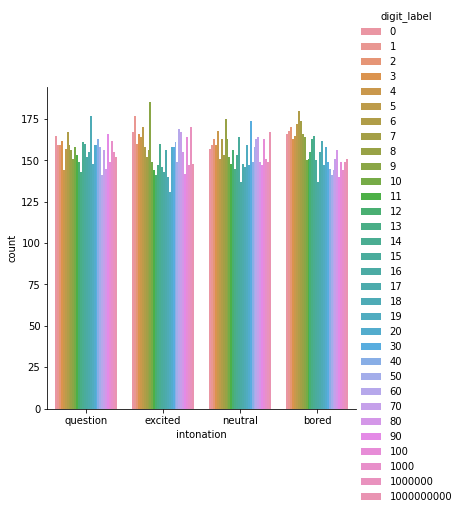

In [188]:
sns.catplot('intonation', data=labels, kind="count", hue="digit_label") # displays a each intontaion and the digit_label it is assoicated with 

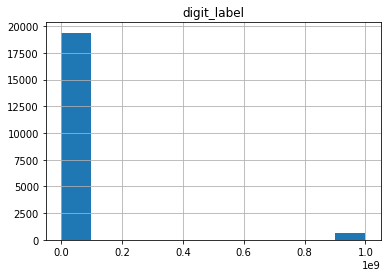

In [189]:
labels.hist()
plt.show() # a histogram of the digit_label showing a lage amount of data at 0 and nearly reaching 20000. Only a small amount eg under 500 is located at 1.0 

# Preprocessing

In this section i preformed pre processing on our data. Preprocessing is the process of doing a pre-analysis of data, in order to transform them into a standard and normalized format.

In [190]:
labels.isna().sum() # In order to check whether our dataset contains missing values, we can use the function isna(), which returns if an cell of the dataset if NaN or not. There seems to be no missing values

File ID        0
digit_label    0
participant    0
intonation     0
dtype: int64

In [191]:
arr = labels['intonation'].unique() # each unqiue value of the intonation column in the dataset

In [192]:
arr

array(['question', 'excited', 'neutral', 'bored'], dtype=object)

I also wanted to use Label encoder to give each intonation a number assigned to it.

In [193]:
from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()

In [194]:
lbl_encode.fit_transform(labels['intonation']) # use one hot encode for each intonation 

array([3, 1, 2, ..., 3, 2, 2])

In [195]:
labels['intonation']=lbl_encode.fit_transform(labels['intonation'])

In [196]:
labels['intonation'].value_counts()

3    5000
2    5000
1    5000
0    5000
Name: intonation, dtype: int64

# Feature extraction : Picth

Audio files are complex data types. Specifically they are discrete signals or time series, consisting of values on a 1D grid. These values are known as samples themselves, which might be a bit confusing, as we have used this term to refer to the items in our dataset. The sampling frequency is the rate at which samples in an audio file are produced. For instance a sampling frequency of 5HZ indicates that 5 produce 5 samples per second, or 1 sample every 0.2 s.

Let's plot one of our audio signals:

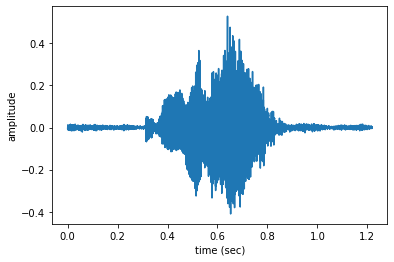

In [204]:
n=0
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n])) # prediction numerial: 12 and intonation: bored

In [205]:
files[n]

'/content/drive/MyDrive/Data/MLEnd/training/Training/0006970.wav'

In [206]:
labels.iloc[6970]

File ID        0006970.wav
digit_label             12
participant           S144
0                        1
1                        0
2                        0
3                        0
Name: 6970, dtype: object

In [207]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples') #the number of samples in one of our audio files

This audio signal has 26880 samples


One approach is to extract a few features from our signals and use these features instead as predictors

In the following cell, we define a function that extracts four features from an audio signal, namely:

1.Power

2.Pitch mean.

3 Pitch standard deviation.

4 Fraction of voiced region.

# Initial pre processing

The problem is to identifying a intonation i would need to use features from the dataset and a target of intonation. Then next cell defines a function that takes a number of files and creates a NumPy array containing the 4 audio features used as predictors (X) and their labels (y).The goal of preprocessing is by reducing the dimensionality while preseving the relevant information for your classification task.

In [6]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag  # we define a new function that gets the pitch of an audio signal.

In [215]:
def getXy(files,labels_file,scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    yi = list(labels_file[labels_file['File ID']==fileID]['intonation'])[0]
    if onlySingleDigit and yi>9:
      continue
    else:
      fs = None # if None, fs would be 22050
      x, fs = librosa.load(file,sr=fs)
      if scale_audio: x = x/np.max(np.abs(x))
      f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
      power = np.sum(x**2)/len(x)
      pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
      pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
      voiced_fr = np.mean(voiced_flag)

      xi = [power,pitch_mean,pitch_std,voiced_fr]
      X.append(xi)
      y.append(yi)
  return np.array(X),np.array(y)

In [216]:
#For my training and validation task, i want to use a sample of the data.
X,y = getXy(files[:500],labels_file=labels,scale_audio=True, onlySingleDigit=False)



  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 1/500 [00:00<02:11,  3.78it/s]

  0%|          | 2/500 [00:00<02:24,  3.45it/s]

  1%|          | 3/500 [00:00<02:17,  3.61it/s]

  1%|          | 4/500 [00:01<02:30,  3.30it/s]

  1%|          | 5/500 [00:01<02:59,  2.76it/s]

  1%|          | 6/500 [00:02<03:09,  2.61it/s]

  1%|▏         | 7/500 [00:02<03:00,  2.73it/s]

  2%|▏         | 8/500 [00:02<03:12,  2.56it/s]

  2%|▏         | 9/500 [00:03<02:58,  2.75it/s]

  2%|▏         | 10/500 [00:03<02:43,  2.99it/s]

  2%|▏         | 11/500 [00:03<02:39,  3.07it/s]

  2%|▏         | 12/500 [00:04<02:59,  2.72it/s]

  3%|▎         | 13/500 [00:04<03:07,  2.60it/s]

  3%|▎         | 14/500 [00:04<02:50,  2.86it/s]

  3%|▎         | 15/500 [00:05<02:36,  3.10it/s]

  3%|▎         | 16/500 [00:05<02:44,  2.94it/s]

  3%|▎         | 17/500 [00:05<02:26,  3.30it/s]

  4%|▎         | 18/500 [00:06<02:34,  3.12it/s]

  4%|▍         | 19/500 [00:06<02:30,  3.20it/s]

  4%|▍         |

In [217]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y) # the shape of X and y and prints the labels vector y

The shape of X is (500, 4)
The shape of y is (500,)
The labels vector is ['bored' 'bored' 'excited' 'question' 'excited' 'excited' 'neutral'
 'bored' 'neutral' 'neutral' 'neutral' 'bored' 'bored' 'question'
 'neutral' 'bored' 'neutral' 'neutral' 'question' 'excited' 'neutral'
 'excited' 'bored' 'excited' 'bored' 'excited' 'excited' 'neutral' 'bored'
 'bored' 'neutral' 'neutral' 'neutral' 'question' 'bored' 'question'
 'neutral' 'neutral' 'question' 'bored' 'bored' 'question' 'bored'
 'question' 'neutral' 'bored' 'excited' 'bored' 'bored' 'question' 'bored'
 'question' 'question' 'bored' 'excited' 'bored' 'neutral' 'neutral'
 'neutral' 'excited' 'neutral' 'bored' 'excited' 'excited' 'excited'
 'question' 'question' 'bored' 'question' 'neutral' 'bored' 'bored'
 'neutral' 'bored' 'question' 'neutral' 'excited' 'question' 'question'
 'excited' 'neutral' 'excited' 'neutral' 'excited' 'neutral' 'neutral'
 'excited' 'excited' 'bored' 'bored' 'question' 'question' 'question'
 'bored' 'neutral'

In [208]:
# If nan sample, remove them
if np.sum(np.isnan(X)):
  idx = np.isnan(X).sum(1)>0
  X = X[~idx]
  y = y[~idx]
print(np.sum(np.isnan(X)))

0


# Basic solution

# Support Vector Machines

In this section i am going to build a support vector machine (SVM) model for the predictive task of identifying intonation in an audio signal, using the dataset that we have just created.

In [ ]:
print("Training set x :", X_train.shape)
print("Training set y :", y_train.shape)
print("Validation set x :", X_val.shape )
print("Validation set y :", y_val.shape)

# Training and validation SVM

In [9]:
# import required modules
from sklearn import svm
from sklearn.svm import SVC 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((350, 4), (150, 4), (350,), (150,))

In [ ]:
from sklearn import svm
model  = svm.SVC(C=100,gamma=3, kernel='rbf')
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.9893333333333333
Validation  Accuracy 0.84


In [ ]:
from sklearn.model_selection import GridSearchCV # I used Grid-search to find the optimal hyperparameters of a model which results in the most 'accurate' predictions.

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   24.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
print(grid.best_estimator_) 

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


# Perforamce evalution SVM

The perforamce metric i used for SVM was Confusion matrix, i was able to use the grid search to find the best model and create a confusing matrix which give me these outputs.

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, yt_p)
cnf_matrix # confusion matrix for training 

array([[94,  0,  2,  0],
       [ 0, 81,  2,  0],
       [ 2,  0, 89,  0],
       [ 0,  0,  0, 80]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#grid_predictions = grid.predict(X_val)
print(classification_report(y_val,yv_p))#Output
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

       bored       0.79      0.79      0.79        34
     excited       1.00      0.76      0.86        41
     neutral       0.82      0.87      0.85        47
    question       0.77      0.96      0.86        28

    accuracy                           0.84       150
   macro avg       0.85      0.85      0.84       150
weighted avg       0.85      0.84      0.84       150



Text(0.5, 257.44, 'Predicted label')

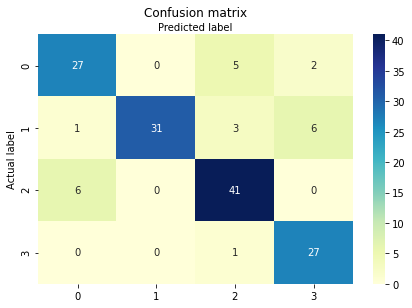

In [ ]:
# In this cell i created a heat map to visaulise the results. 
class_names=['bored','excited','neutral','bored'] # name  of classes bored = 0, excited = 1, neutral = 2, question = 3
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Conclusion

The first model I want to use for training and validate my data using SVM. It is a supervised machine learning model that employs classification algorithms for two unique classification problems. After providing the labelled training data to the SVM model, I was able to adapt it and make predictions. I then calculated the accuracy of the training as well as the accuracy of the validation. During the training and validation task I performed a grid search to find the best parameters that enabled me to find the best model for my data. In the end, I managed to get a validation accuracy of 84% which is quite good. Next, I wanted to evaluate my model's performance using a confusing matrix and classification report. Excited had the highest precision, question had the highest recall, it was a tie between excited and question for f1-score.in the training confusing matrix bored had the highest value with 94.  Overall neutral the highest number in the validation confusing matrix of 41. 

# KNN Classifer

The k nearest neighbours algorithm is an instance-based method that assigns a new sample to the majotiry class amongst the k closest training samples. From a statistical point of view, we can see kNN as a method that creates posterior probabilities by identifying the closest training samples and obtaining the fraction of samples belonging to each class.

In the cell below we will create several kNN classifiers for different values of k, will show the resulting decision regions and finally will obtain their validation accuracy.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
# Import module for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score
# Create  the kNN model with k=16
# n_neighbors -> argument identifies the amou ntof neighbors used to ID classification
knn = neighbors.KNeighborsClassifier(n_neighbors=1,leaf_size=1,p=2)
# knn model traning
knn.fit(X_train, y_train)
#prediction 
y_pred = knn.predict( X_val )
y_pred2 = knn.predict( X_train )
val_accuracy = accuracy_score(y_val, y_pred)
print('KNN Model Training Accuracy', np.mean(y_pred2==y_train))
print("KNN Model Validation Accuracy : {:.2f}".format( val_accuracy * 100 ))

KNN Model Training Accuracy 1.0
KNN Model Validation Accuracy : 86.00


# Training and validation KNN

I will use cross validation to find the best value of K for KNN and then I will split the dataset into training and validation and use the value of K that I found to train the model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 1 is  0.86


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 9 is  0.4866666666666667


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 17 is  0.47333333333333333


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 25 is  0.44666666666666666


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 33 is  0.46


<IPython.core.display.Javascript object>

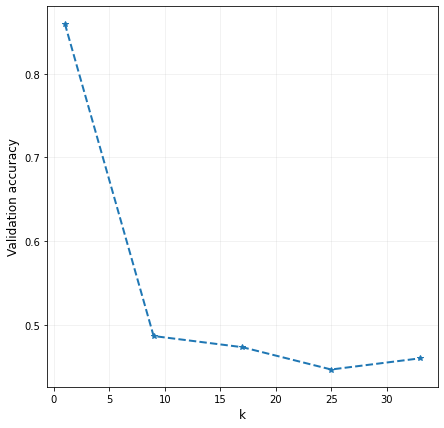

In [ ]:
from google.colab import widgets
from sklearn import neighbors
from matplotlib.colors import ListedColormap

k_values = range(1,40,8)
tb = widgets.TabBar([str(k) for k in k_values])

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

accuracy = dict.fromkeys(k_values)

for k in k_values:
  with tb.output_to(str(k), select= (k < 2)):

    # First we create the kNN model
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)


    # Finally we calculate the validation accuracy
    y_val_pred = knn.predict(X_val)
    accuracy[k] = np.sum(y_val==y_val_pred)/len(y_val)

    print("The validation accuracy for k=", k, "is ", accuracy[k])


# Here we predict the value of the validation accuracy as a function of k
plt.figure(figsize=(7, 7))
plt.plot(k_values, list(accuracy.values()), '--*', linewidth=2)
plt.xlabel("k", fontsize=12)
plt.ylabel("Validation accuracy", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

# Performance evalution KNN

In [12]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, y_pred2)
cnf_matrix # confusion matrix for training 

array([[84,  0,  0,  0],
       [ 0, 92,  0,  0],
       [ 0,  0, 88,  0],
       [ 0,  0,  0, 86]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#grid_predictions = grid.predict(X_val)
print(classification_report(y_val,y_pred))#Output
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

       bored       0.76      0.85      0.81        34
     excited       0.97      0.80      0.88        41
     neutral       0.85      0.83      0.84        47
    question       0.88      1.00      0.93        28

    accuracy                           0.86       150
   macro avg       0.86      0.87      0.86       150
weighted avg       0.87      0.86      0.86       150



In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

array([[29,  1,  3,  1],
       [ 2, 33,  4,  2],
       [ 7,  0, 39,  1],
       [ 0,  0,  0, 28]])

Text(0.5, 257.44, 'Predicted label')

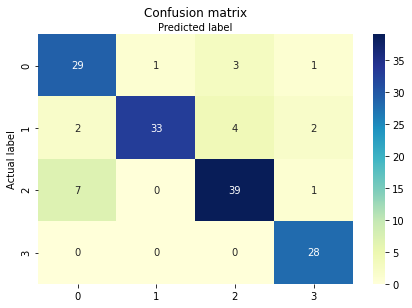

In [ ]:
class_names=['bored','excited','neutral','bored'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Generate function to add error rates of KNN with various k-values
# error_rate -> empty list to gather error rates at various k-values
# for loop -> loops through k values 1 to 39
# knn -> creates instance of KNeighborsClassifier with various k
# knn.fit -> trains the model
# pred_i -> conducts predictions from model on test subset
# error_rate.append -> adds error rate of model with various k-value, using the average where prediction not
# equal to the test values
error_rate = []
for i in range(1,70):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    error_rate.append(np.mean(pred_i != y_val))

Text(0, 0.5, 'Error Rate')

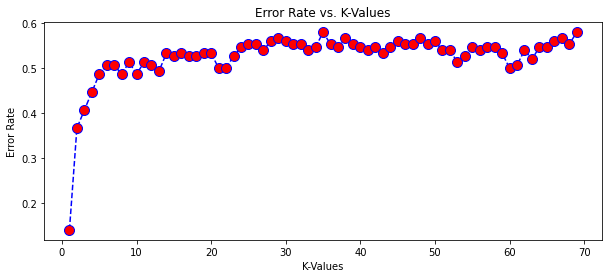

In [ ]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,70), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

# Conclusion

The second model I intended to use for this data is the KNN classifier. A machine learning classifier, which I believe will work and work best. First, I created the model, adapted it to the training data and made some predictions. Firstly, getting the X and y values then training and validating it. I then calculated both the accuracy of the training and the validations that gave me good values; validation accuracy of 86%. by creating the model and fitting them into the training data. Later I decided to find the optimum parameters and the value k which gave me the best validation precision which is k=1. Then, to test performance, I continued with a confusion matrix and a classification report. Excited had the best precision, while question had the best f1-score and recall, Overall from the confusion matrix neutral and the better score of an actual and predicted label value of 39. I then created a function for tracing the error rates of k-values. Here in the graph above the value k=1 has an error rate close to 0 compared to k= 70 which is 0.6. This graph has allowed me to visual see how the value of k effects the rate of error and i wanted to try minmise this to build the best soultion. 

# Random Forests

The last model i'll be using is the Random Forest classifer which creates a set of decision trees from a randomlu select subset of training set. This model is able to aggregare the different decision trees and decide on a final class.



In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=29)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
y_pred2 = rf.predict(X_train)

In [19]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, y_pred2)
cnf_matrix # confusion matrix for training 

array([[84,  0,  0,  0],
       [ 0, 91,  0,  1],
       [ 0,  0, 88,  0],
       [ 0,  0,  1, 85]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))

[[32  1  1  0]
 [ 2 32  4  3]
 [ 5  1 40  1]
 [ 0  1  0 27]]
              precision    recall  f1-score   support

       bored       0.82      0.94      0.88        34
     excited       0.91      0.78      0.84        41
     neutral       0.89      0.85      0.87        47
    question       0.87      0.96      0.92        28

    accuracy                           0.87       150
   macro avg       0.87      0.88      0.88       150
weighted avg       0.88      0.87      0.87       150

0.8733333333333333


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

array([[32,  1,  1,  0],
       [ 2, 32,  4,  3],
       [ 5,  1, 40,  1],
       [ 0,  1,  0, 27]])

Text(0.5, 257.44, 'Predicted label')

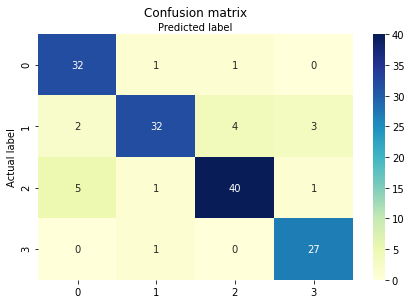

In [ ]:
class_names=['bored','excited','neutral','bored'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1800}

# Conclusion

Finally, the model I chose was Random Forest closer because I felt this model would work well on this data too. First, I adjust the training data, then I proceed with the calculation of the forecasts. i split the data into training a validation and then fitted it into the random forst model. I manage to achieve a high accuracy result I then used gride search to find the best parameters for my model to find the best fit and then the performance I used a confusion matrix and a classification report. The validation for this model is 87%. Excited had the highest value ofe the training confusion matrix. For the validation confusion matrix excited had the best precision while question had the best rate for the recall and f1-score. Overall in the confusion matrix neutral has the highest with 40 actual and predicted label.

# Final Conclusion

Out of the Three classifers i have used Random forest provided the best validation accraccy. This helps me pick out the best parameters and model to use for testing and prediction. I am to use this model and test it on the full dataset below. If the data was to be tested on unseen data then i'd beleieve that neutral would appear the most and be predicted as the Intonation. 

In [148]:
def getXy(files,labels_file,scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    yi = list(labels_file[labels_file['File ID']==fileID]['intonation'])[0]
    if onlySingleDigit:
      continue
    else:
      fs = None # if None, fs would be 22050
      x, fs = librosa.load(file,sr=fs)
      if scale_audio: x = x/np.max(np.abs(x))
      f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
      power = np.sum(x**2)/len(x)
      pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
      pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
      voiced_fr = np.mean(voiced_flag)

      xi = [power,pitch_mean,pitch_std,voiced_fr]
      X.append(xi)
      y.append(yi)
  return np.array(X),np.array(y)

In [150]:
#X,y = getXy(files,labels_file=labels,scale_audio=True, onlySingleDigit=False)
X,y = getXy(files[:10000],labels_file=labels,scale_audio=True, onlySingleDigit=False)

Streaming output truncated to the last 5000 lines.

 75%|███████▌  | 7501/10000 [42:40<14:11,  2.94it/s]

 75%|███████▌  | 7502/10000 [42:40<13:23,  3.11it/s]

 75%|███████▌  | 7503/10000 [42:41<14:18,  2.91it/s]

 75%|███████▌  | 7504/10000 [42:41<14:07,  2.95it/s]

 75%|███████▌  | 7505/10000 [42:41<13:05,  3.18it/s]

 75%|███████▌  | 7506/10000 [42:42<13:24,  3.10it/s]

 75%|███████▌  | 7507/10000 [42:42<14:06,  2.95it/s]

 75%|███████▌  | 7508/10000 [42:43<13:46,  3.01it/s]

 75%|███████▌  | 7509/10000 [42:43<16:52,  2.46it/s]

 75%|███████▌  | 7510/10000 [42:44<17:06,  2.43it/s]

 75%|███████▌  | 7511/10000 [42:44<16:01,  2.59it/s]

 75%|███████▌  | 7512/10000 [42:44<14:48,  2.80it/s]

 75%|███████▌  | 7513/10000 [42:44<14:01,  2.95it/s]

 75%|███████▌  | 7514/10000 [42:45<14:23,  2.88it/s]

 75%|███████▌  | 7515/10000 [42:45<13:30,  3.07it/s]

 75%|███████▌  | 7516/10000 [42:45<12:52,  3.21it/s]

 75%|███████▌  | 7517/10000 [42:46<12:47,  3.23it/s]

 75%|███████▌  | 7518/10000 [4

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape # i wanted to use half the data(10000) to make my prediction

((7000, 4), (3000, 4), (7000,), (3000,))

In [155]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=29)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [158]:
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])
print(y_pred[3])
print(y_pred[4])
print(y_pred[5]) # made 5 prediction on the next intonation and neutral appeared the most

excited
question
neutral
neutral
bored
neutral


# Advance solution 

For my advance soultion i want to predict a numeral between 0-9 in a short audo sequenace. In this selection i will be using the getXy function with the same input as my basic soultion but my target will be digit_label. 

In [164]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag  # we define a new function that gets the pitch of an audio signal.

In [165]:
def getXy(files,labels_file,scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    yi = list(labels_file[labels_file['File ID']==fileID]['digit_label'])[0]
    if onlySingleDigit and yi>9:
      continue
    else:
      fs = None # if None, fs would be 22050
      x, fs = librosa.load(file,sr=fs)
      if scale_audio: x = x/np.max(np.abs(x))
      f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
      power = np.sum(x**2)/len(x)
      pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
      pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
      voiced_fr = np.mean(voiced_flag)

      xi = [power,pitch_mean,pitch_std,voiced_fr]
      X.append(xi)
      y.append(yi)
  return np.array(X),np.array(y)

In [166]:
#X,y = getXy(files,labels_file=labels,scale_audio=True, onlySingleDigit=False)
X,y = getXy(files[:500],labels_file=labels,scale_audio=True, onlySingleDigit=True)



  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 2/500 [00:00<01:25,  5.81it/s]

  1%|          | 4/500 [00:00<01:27,  5.65it/s]

  1%|          | 5/500 [00:01<02:06,  3.92it/s]

  2%|▏         | 10/500 [00:01<01:36,  5.10it/s]

  2%|▏         | 12/500 [00:01<01:38,  4.95it/s]

  3%|▎         | 13/500 [00:02<02:06,  3.85it/s]

  3%|▎         | 14/500 [00:02<02:08,  3.77it/s]

  3%|▎         | 15/500 [00:02<02:10,  3.70it/s]

  3%|▎         | 17/500 [00:03<01:48,  4.44it/s]

  6%|▌         | 31/500 [00:03<01:16,  6.14it/s]

  7%|▋         | 34/500 [00:03<01:03,  7.32it/s]

  7%|▋         | 37/500 [00:03<00:53,  8.60it/s]

  8%|▊         | 39/500 [00:04<00:55,  8.30it/s]

  8%|▊         | 41/500 [00:04<01:01,  7.45it/s]

  9%|▉         | 44/500 [00:04<00:56,  8.00it/s]

  9%|▉         | 46/500 [00:04<00:57,  7.93it/s]

 10%|▉         | 49/500 [00:05<00:50,  9.00it/s]

 11%|█▏        | 57/500 [00:05<00:39, 11.10it/s]

 12%|█▏        | 60/500 [00:05<00:39, 11.10it/s]

 13%|█▎   

In [167]:
# import required modules
from sklearn import svm
from sklearn.svm import SVC 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((109, 4), (48, 4), (109,), (48,))

In [168]:
from sklearn import svm
model  = svm.SVC(C=100)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.26605504587155965
Validation  Accuracy 0.08333333333333333


In [169]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=100)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val)) #normalise the predictors

Training Accuracy 0.8715596330275229
Validation  Accuracy 0.125


In [170]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_val,yv_p)
cnf_matrix # confusion matrix for training 

array([[0, 1, 0, 0, 0, 2, 0, 1, 0, 0],
       [0, 2, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 2, 0, 0, 2, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 2],
       [0, 1, 1, 0, 3, 1, 1, 1, 0, 1],
       [0, 0, 0, 2, 0, 0, 2, 0, 0, 0],
       [0, 1, 2, 1, 1, 0, 0, 1, 0, 0],
       [0, 2, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 2, 1, 0, 0, 0, 0, 0]])

In [171]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, yt_p)
cnf_matrix # confusion matrix for training 

array([[11,  0,  1,  1,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  1,  0, 11,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  3,  0],
       [ 0,  1,  0,  0,  1,  0,  1,  0,  0,  9]])

In [172]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val,yv_p))#Output
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.17      0.50      0.25         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4
           5       0.33      0.11      0.17         9
           6       0.40      0.50      0.44         4
           7       0.20      0.17      0.18         6
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         5

    accuracy                           0.12        48
   macro avg       0.11      0.13      0.10        48
weighted avg       0.13      0.12      0.11        48



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 257.44, 'Predicted label')

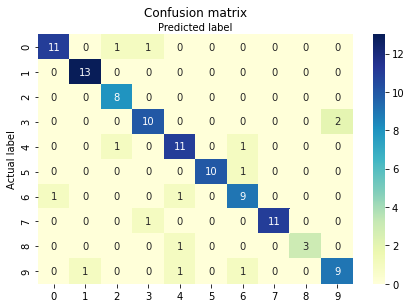

In [173]:
# In this cell i created a heat map to visaulise the results. 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Conclusion

First, I was able to obtain my X and y values and divide the data into training and validation. I then used the SVM model for my data and it gave me bad results for validating. I then tried to adjust the settings, but nothing came of it and it kept giving me bad results. I then proceeded to assess its performance and it produced a low accuracy rate of 0.19. I think that's why we don't have good results. One possible solution is to add more data and change the input data. In the Confusion Matrix 6 had the most actual label value of 3.

# Referances

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f